In [53]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

# Code to load the components

In [29]:
def load_dataset(h5_file):
    with h5py.File(h5_file, "r") as h5:
        noise = h5['noise'][:]
        A = h5['evolving_tensor/A'][:]
        C = h5['evolving_tensor/C'][:]
        B = [h5[f'evolving_tensor/B_{k:03d}'][:] for k in range(C.shape[0])]
            
    return (A, B, C), noise

The components and noise are stored in HDF5 files. The diagonal entries of the $\mathbf{D}_k$ matrices are stored as rows of a $\mathbf{C}$ matrix.

## Loading the dataset

In [32]:
(A, Bs, C), noise = load_dataset("simulated_datasets/Non negativity/000.h5")

Three ways to construct the matrix stack

In [39]:
# Explicitly constructing diagonal matrices
## Less efficient but more transparent if you are not familiar with broadcasting

X = [A @ np.diag(Ck) @ Bk.T for Bk, Ck in zip(Bs, C)]

In [35]:
# Using array broadcasting 
## More efficient than constructing diagonal matrices

X = [A * Ck[np.newaxis] @ Bk.T for Bk, Ck in zip(Bs, C)]  # Ck[np.newaxis] has shape=(1, 3) while Ck has shape=(3,)

In [41]:
# Using einsums
## More efficient than constructing diagonal matrices
## Constructs a 3-mode numpy array instead of a list of matrices

## The line below is equivalent to saying X_{kij} = \sum_r A_{ir} B_{kjr} C{kr}
X = np.einsum('ir,kjr,kr -> kij', A, Bs, C)

## Adding noise

In [50]:
noise_level = 0.33
X_noisy = X + noise_level * noise * la.norm(X) / la.norm(noise)

print("We print the the relative reconstruction error to make sure the noise is added correctly:")
print(la.norm(X_noisy - X) / la.norm(X))

We print the the relative reconstruction error to make sure the noise is added correctly:
0.33


## Non negative components

In [51]:
(A, Bs, C), noise = load_dataset("simulated_datasets/Non negativity/000.h5")

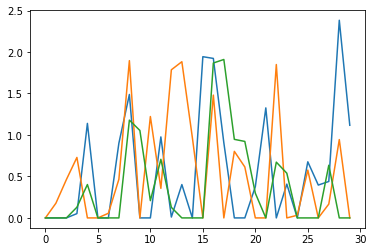

In [54]:
plt.plot(Bs[0])

## Emmision spectra from fluoresence spectroscopy

In [55]:
(A, Bs, C), noise = load_dataset("simulated_datasets/Laplacian/000.h5")

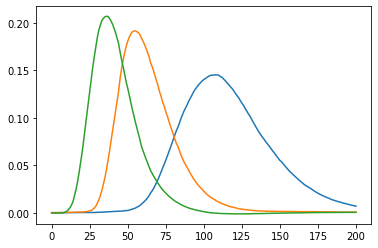

In [56]:
plt.plot(Bs[0])

## Piecewise constant components

In [57]:
(A, Bs, C), noise = load_dataset("simulated_datasets/TV/000.h5")

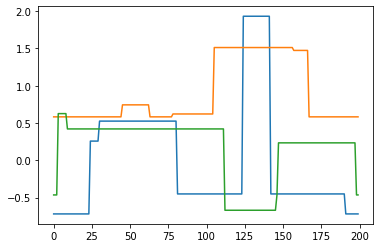

In [58]:
plt.plot(Bs[0])